# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_blobs(n_samples=1000,centers=2, random_state=42)

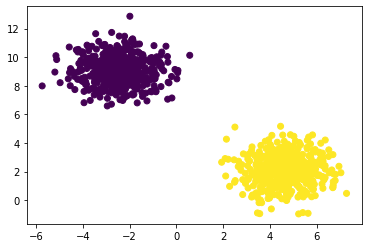

In [3]:
plt.scatter(X[:,0],X[:,1], c=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [5]:
model=LogisticRegression()

In [6]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
model.coef_,model.intercept_

(array([[ 1.26415035, -1.21172442]]), array([5.49040014]))

In [8]:
x1_sample = np.linspace(-6,7)

In [9]:
colors = ["red","blue"]

In [10]:
y_colors=list(map(lambda c: colors[c],y))

In [11]:
y_colors[:5],y[:5]

(['red', 'blue', 'blue', 'blue', 'blue'], array([0, 1, 1, 1, 1]))

In [12]:
len(y_colors),len(y)

(1000, 1000)

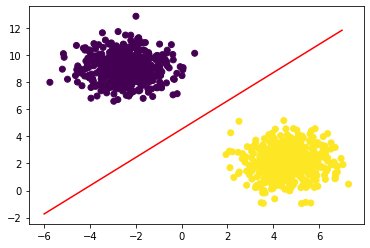

In [13]:
plt.scatter(X[:,0], X[:,1],c=y)

for i, (coef,intercept) in enumerate(zip(model.coef_, model.intercept_)):
    x2_sample = -coef[0] / coef[1] * x1_sample - intercept / coef[1]
    plt.plot(x1_sample, x2_sample, color=colors[i])

In [14]:
model.score(X_test, y_test)

1.0

# Custom Implementation

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X, y = make_blobs(centers=2, random_state=42)

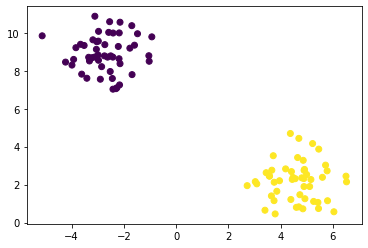

In [17]:
plt.scatter(X[:,0],X[:,1], c=y)

In [18]:
class CustomLogisticRegression:
    
    # constructor
    def __init__(self, lr=0.01, iters= 20):
        self._lr = lr
        self._iters = iters
    
    def fit(self, X, y):
        self._y = y.reshape(-1,1)
        X_mod = np.hstack([np.ones([len(X), 1]), X])                                # X.shape = (1000,2)
        self._X = X_mod
        
        self._theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self._iters):
            err.append(self.error())
            self.gradient_ascent()
            
        self.theta = self._theta
        
        return err
    
    def gradient_ascent(self):
        delta_theta = self.gradient()
      # print(delta_theta.shape) # (3,1)
        self._theta -= delta_theta
    
    def gradient(self):
        yh = self.hypothesis(self._X)
     # print(yh.shape) # (1000, 1)
        ya = self._y
        diff = -(ya - yh)                                                                    # (1000, 1) # here i have taken -ve of log likelyhood, hence gradiet descent            
        return np.dot(self._X.T, diff) * self._lr                             # (3,1) # for every feature, sum(diff * ith example)
    
    def hypothesis(self, X):
        prod = np.dot(X, self._theta)
     # print(X.shape) # (1000,3)
    # print(self.__theta.shape) # (3,1)
     # print(prod.shape) # (1000,1)
        return 1 / (1 + np.exp(-prod))
 
    def error(self):
        yh = self.hypothesis(self._X)
        ya = self._y
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)                                              # ll is Likelihood
     # print(ll.shape) # (1000, 1)
        return -np.mean(ll)

    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)
    
    def confusion_matrix(self, X, y):
        yp = self.predict(X)
        
        tp = np.mean((y==1) & (yp==1))
        tn = np.mean((y==0) & (yp==0))
        fp = np.mean((y==0) & (yp==1))
        fn = np.mean((y==1) & (yp==0))
        
        return np.array([[tp, fp], [fn, tn]])

In [19]:
model = CustomLogisticRegression()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [21]:
err = model.fit(X_train, y_train)

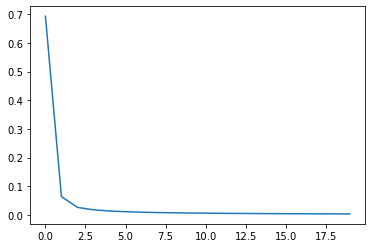

In [22]:
plt.plot(err)

In [24]:
model.theta

array([[ 0.12555144],
       [ 1.71678641],
       [-0.74610907]])

In [25]:
model.score(X_test, y_test)

1.0

In [ ]:
model.confusion_matrix(X_test, y_test)